In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
# Cryptarchia lottery function

def phi(f, alpha):
    return 1 - (1-f)**alpha

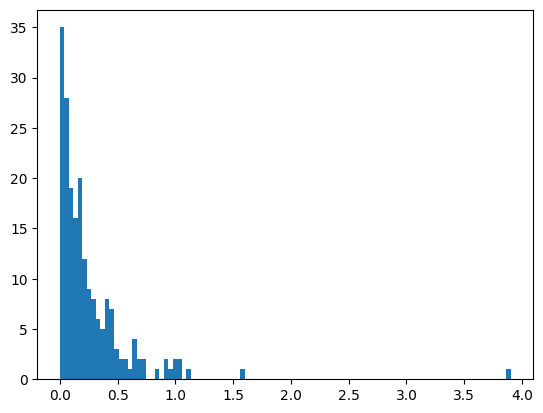

In [3]:
# Generate stake distribution
total_notes = 200

stake = np.random.pareto(5, total_notes)
_ = plt.hist(stake, bins=100)

In [4]:
# True Total Stake
true_stake = np.array(stake).sum()
true_stake

np.float64(50.95342907073725)

In [5]:
f = 1/30 # occupancy rate
T = int(10 * 2160 / f) # epoch length, 10k/f

In [6]:
epochs = 30
D_values = []
D_values_hi = []

shock_size = [5, 10, 25, 50]
epochs_to_reach = [-1, -1, -1, -1]
epochs_to_reach_hi = [-1, -1, -1, -1]
for j in range(0, len(shock_size)):
    D_values_j = []
    
    # Initial stake estimate (lower shock)
    D_ell = true_stake - (true_stake * shock_size[j] / 100)
    for i in range(0, epochs):
    
        # Running one epoch of the cryptarchia lottery
        alpha = stake / D_ell
        p_lottery = phi(f, alpha)
        wins = np.random.uniform(0, 1, (T, len(stake))) < p_lottery
    
        # Total Stake Inference
        empirical_slot_activation_rate = (wins.sum(axis=1) != 0).sum() / T
        error = f - empirical_slot_activation_rate
    
        # Learning coefficient
        beta = 0.8
        h = beta * (D_ell / f)
    
        # New total stake estimate
        D_ell = D_ell - h * error
        D_values_j.append(D_ell)

        if epochs_to_reach[j] < 0 and D_ell >= true_stake:
            epochs_to_reach[j] = i
            print(D_ell, " ", true_stake, "success", epochs_to_reach[j])
            
    D_values.append(D_values_j)

    D_values_j = []
    
    # Initial stake estimate (lower shock)
    D_ell = true_stake + (true_stake * shock_size[j] / 100)
    for i in range(0, epochs):
    
        # Running one epoch of the cryptarchia lottery
        alpha = stake / D_ell
        p_lottery = phi(f, alpha)
        wins = np.random.uniform(0, 1, (T, len(stake))) < p_lottery
    
        # Total Stake Inference
        empirical_slot_activation_rate = (wins.sum(axis=1) != 0).sum() / T
        error = f - empirical_slot_activation_rate
    
        # Learning coefficient
        beta = 0.8
        h = beta * (D_ell / f)
    
        # New total stake estimate
        D_ell = D_ell - h * error
        D_values_j.append(D_ell)

        if epochs_to_reach_hi[j] < 0 and D_ell <= true_stake:
            epochs_to_reach_hi[j] = i
            print(D_ell, " ", true_stake, "success", epochs_to_reach_hi[j])
            
    D_values_hi.append(D_values_j)

51.334709068122095   50.95342907073725 success 3
50.7864176960449   50.95342907073725 success 4
51.18820967188592   50.95342907073725 success 2
50.60103188904984   50.95342907073725 success 3
51.067905207934686   50.95342907073725 success 4
50.90080155155143   50.95342907073725 success 5
50.995763659016596   50.95342907073725 success 2
50.70583527540505   50.95342907073725 success 2


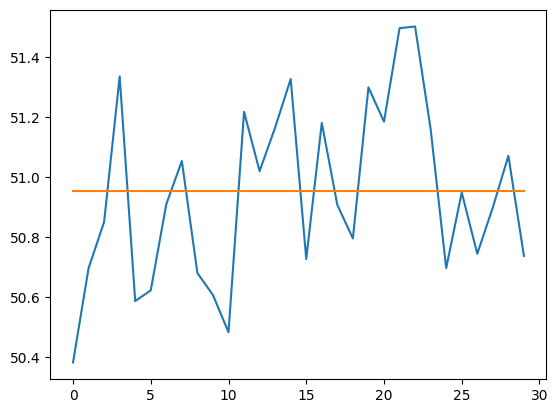

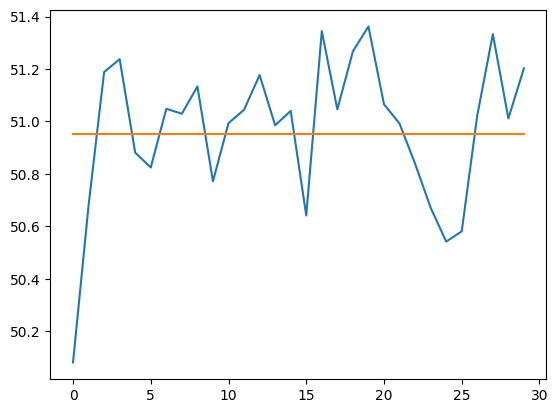

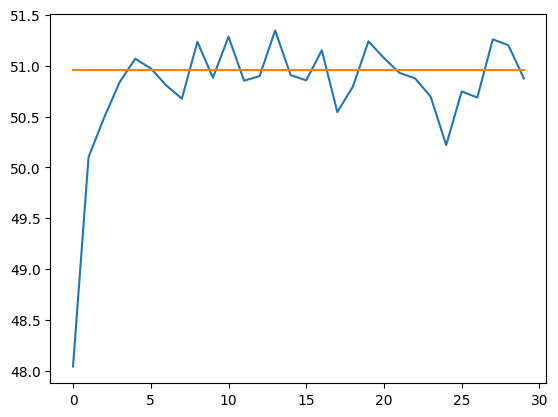

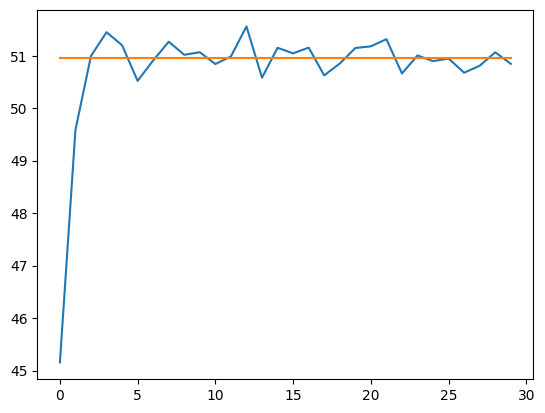

In [7]:
# plot convergence for lower estimates
for i in range(0, 4):
    plt.plot(range(0, epochs), D_values[i])
    _ = plt.plot(range(0, epochs), np.full_like(range(0, epochs), true_stake, dtype=float))
    plt.show()

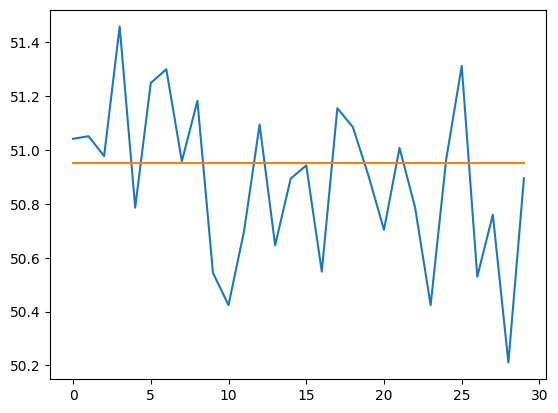

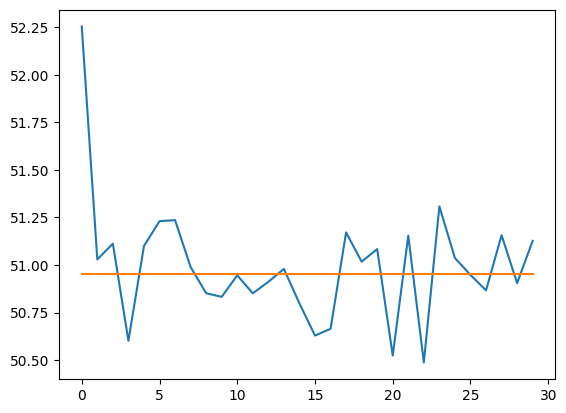

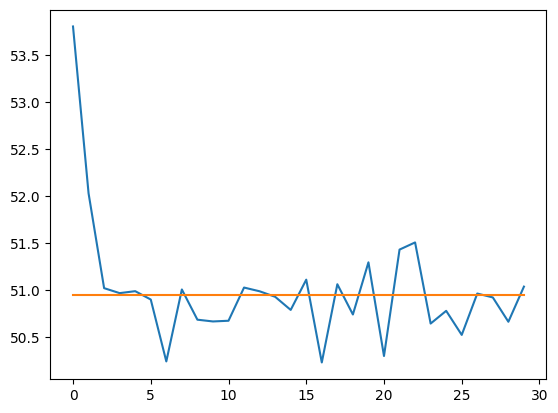

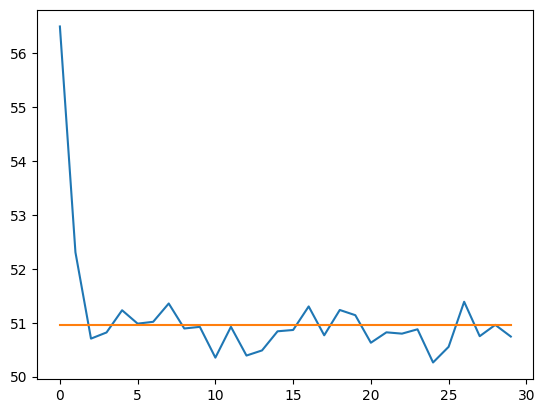

In [8]:
# plot convergence for higher estimates
for i in range(0, 4):
    plt.plot(range(0, epochs), D_values_hi[i])
    _ = plt.plot(range(0, epochs), np.full_like(range(0, epochs), true_stake, dtype=float))
    plt.show()

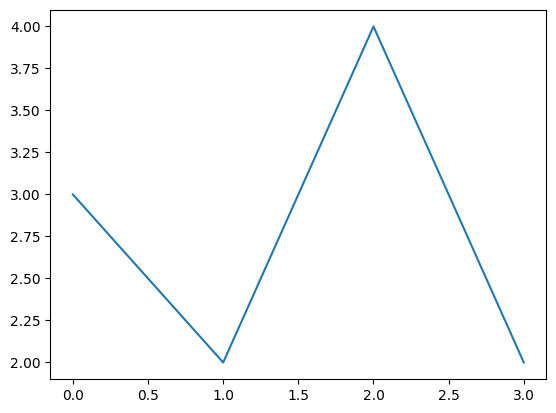

In [9]:
plt.plot(range(0,4), epochs_to_reach)

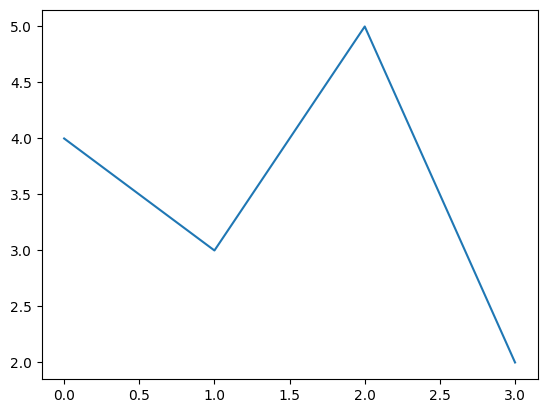

In [10]:
plt.plot(range(0,4), epochs_to_reach_hi)